<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/midterm/FDSFE_MIDTERM_2024_real_estate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FDSFE 2024  MIDTERM: Real Estate Price Prediction Using Data Science


1. Data Ingestion
2. Data Exploration
3. Data Cleaning and Preparation.
4. Training a Model
5. Model Evaluation
    

<!-- <div style=" width: 80%; margin: 5px auto; background:#31363F; border-radius: 10px; padding: 2px; display: flex; align-items: center; justify-content: center; gap: 1px;">
<!--     <span style="font-size: 40px; color: hsl(178, 100%, 50%)"> 👋 </span>  -->
<div>

<!-- <h1 style="  
  margin: 0;
  color: hsl(176, 100%, 28%);
  font-weight: 800;">

  Welcome to my Notebook!

</h1>

<p style="
  color: Orange;
  line-height: 0.5;">

  Feel free to explore the contents. 📚

</p>
    </div>
</div> -->


The Bengaluru_House_Data dataset contains details of residential properties in Bengaluru, India. It includes attributes like the area_type, location, availability, size, society, total_sqft, bath, balcony and price across different localities in the city. You should perform exploratory data analysis (EDA), train a linear regression model to predict prices.

# Data Cleaning and Preparation


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams["figure.figsize"] = (4,2)

In [ ]:
#read in the data, call your dataframe Bhouses
Bhouses = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
# inspect the dataset by looking at the top 5 rowa and bottom 5 rows. Are they consistent in format and content?
Bhouses.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
Bhouses.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


Descriptive Statistics: get
- the shape of the the dataset,
- the statistical properties of each column (mean, median, min, max....), and comment on what you notice from this report
- the data type

In [ ]:
Bhouses.shape

(13320, 9)

In [ ]:
Bhouses.describe()

,total_sqft,bath,balcony,price
count,13073.000000,13247.000000,12711.000000,13320.000000
mean,1554.942029,2.692610,1.584376,112.565627
std,1238.458773,1.341458,0.817263,148.971674
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


In [ ]:
Bhouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


Only a few columns are shown in describe? Why? because the other columns are not numerical! **total_sqft** _should_ be numerical too tho, as it reports the total square footage which is a numerical quantity.

Sometimes a numerical colum has a few entries that have words in them, thus Pandas default to read all entries as strings. The next few lines of code will convert the numerical values in the column to float, and will set the other values to NaN (Not a Number).


In [ ]:
# Convert 'total_sqft' to numeric, handling non-numeric values
Bhouses['total_sqft'] = pd.to_numeric(Bhouses['total_sqft'], errors='coerce')
Bhouses['total_sqft']

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


#save the shape of the DF in a variable shape_original


In [ ]:
shape_original = Bhouses.shape

In [ ]:
Bhouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


# Create a reduced dataset with only the numerical columns and the column called "total_sqft"

In [ ]:
# Bhouses_restricted  should be the original dataset with but ontain only the numerical columns (see Bhouses.info() to figure out which are numerical)
Bhouses_restricted = Bhouses[["total_sqft", "bath", "balcony", "price"]]

In [ ]:
Bhouses_restricted.head()

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00


# Data Cleaning

find missing values and remove them (as done in the Videos demo)

In [ ]:
Bhouses_restricted.isnull().sum()

,0
total_sqft,247
bath,73
balcony,609
price,0


# remove the rows with missing values. Report on the new shape of the dataframe, what fraction of the dataset was lost?


In [ ]:
Bhouses_restricted.dropna(inplace=True)
Bhouses_restricted.shape[0]

<ipython-input-188-e0b6391ca392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bhouses_restricted.dropna(inplace=True)


12525

In [ ]:
shape_restricted = Bhouses_restricted.shape

In [ ]:
print("fraction of lost data: {:.2f} % ".format((shape_original[0] - shape_restricted[0]) / shape_original[0] * 100))

fraction of lost data: 5.97 % 


In [ ]:
Bhouses_restricted.isnull().sum()

,0
total_sqft,0
bath,0
balcony,0
price,0


# Outliers removal


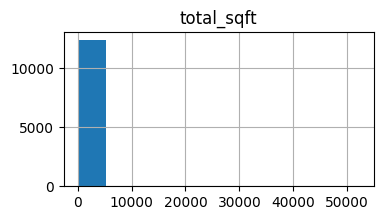

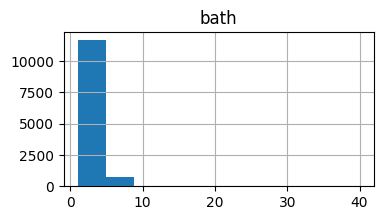

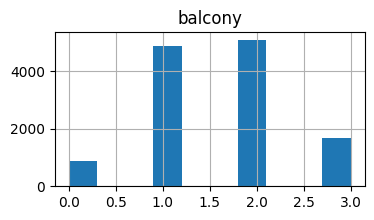

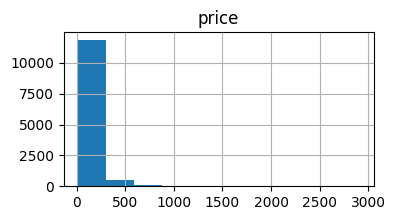

In [ ]:
for f in Bhouses_restricted.columns:
  Bhouses_restricted[[f]].hist()

# Why do some of the histograms have so much white space to the right? (because there are very few, very high value entries!)

remove outliers:
- total_sqft: Choose a value for total_sqft that can be considered an upper limit of the distribution such that values larger than this are "outliers". Exclude the corresponding rows from the dataframe.

- bath: do the same for bath

- price: do the same for price

In [ ]:
Bhouses_restricted = Bhouses_restricted[Bhouses_restricted.total_sqft < 10000]

In [ ]:
Bhouses_restricted = Bhouses_restricted[Bhouses_restricted.bath < 15]

In [ ]:
Bhouses_restricted = Bhouses_restricted[Bhouses_restricted.price < 1000]

In [ ]:
shape_clean = Bhouses_restricted.shape
print("fraction of lost data: {:.2f} % ".format((shape_original[0] - shape_clean[0]) / shape_original[0] * 100))

fraction of lost data: 6.35 % 


# again describe the dataset statistical properties and again plot the histogram of each feature

In [ ]:
Bhouses_restricted.describe()

,total_sqft,bath,balcony,price
count,12474.000000,12474.000000,12474.000000,12474.000000
mean,1471.230905,2.602453,1.602934,101.471770
std,732.398029,1.137312,0.802682,98.605728
min,5.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,49.350000
50%,1260.000000,2.000000,2.000000,70.000000
75%,1630.750000,3.000000,2.000000,113.000000
max,9600.000000,13.000000,3.000000,995.000000


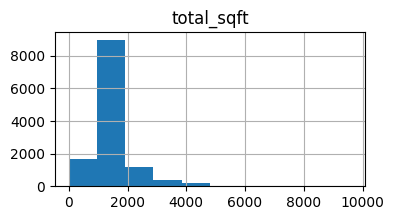

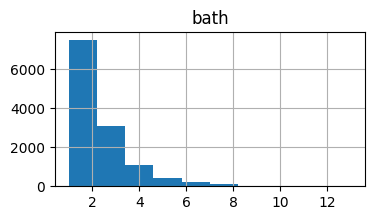

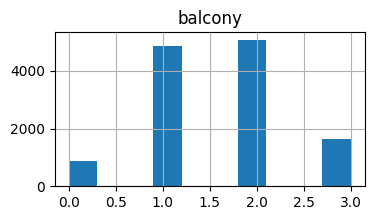

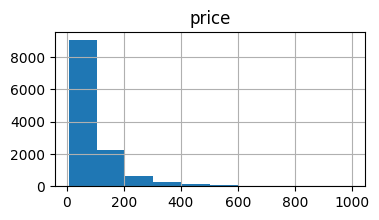

In [ ]:
for f in Bhouses_restricted.columns:
  Bhouses_restricted[[f]].hist()

# now look at the correlation of the features, print the correlation report and plot the correlation heatmap

In [ ]:
Bhouses_restricted.corr()

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.561541,0.228075,0.725174
bath,0.561541,1.000000,0.232023,0.541325
balcony,0.228075,0.232023,1.000000,0.131772
price,0.725174,0.541325,0.131772,1.000000


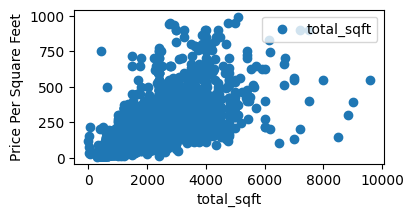

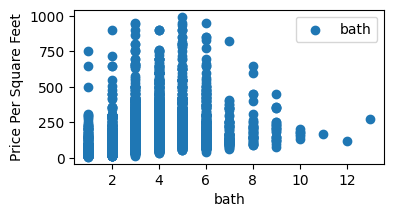

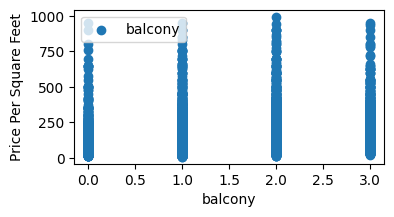

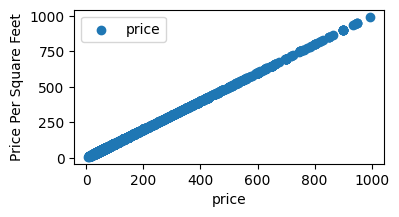

In [ ]:
for f in Bhouses_restricted.columns:
  plt.scatter(Bhouses_restricted[f], Bhouses_restricted["price"], label=f)
  plt.xlabel(f)
  plt.ylabel('Price Per Square Feet')
  plt.legend()
  plt.show()



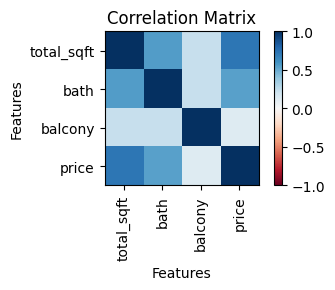

In [ ]:
plt.imshow(Bhouses_restricted.corr(), cmap="RdBu", clim=(-1,1))
plt.colorbar()
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix")
plt.xticks(range(len(Bhouses_restricted.columns)), Bhouses_restricted.columns, rotation=90)
plt.yticks(range(len(Bhouses_restricted.columns)), Bhouses_restricted.columns)
plt.show()


# Which is the most correlated feature? Build a linear regression using this feature as exogenous (independent) variable

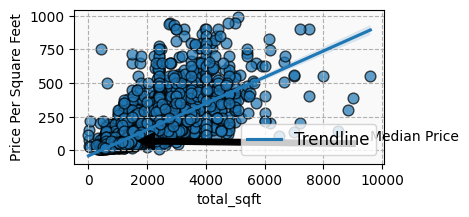

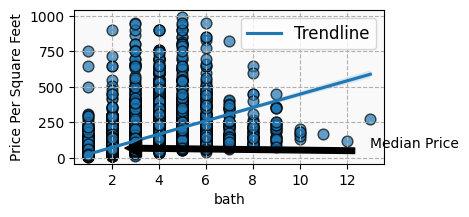

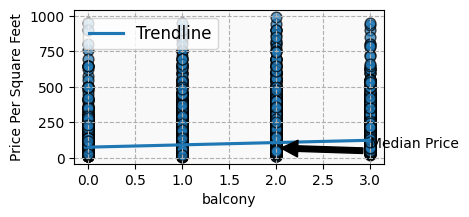

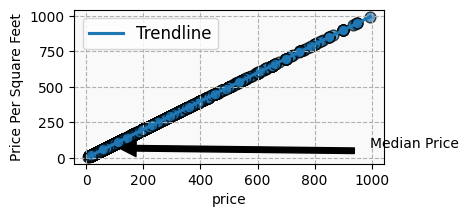

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_chart(df, f):
    plt.figure(figsize=(4, 2))  # Adjust figure size

    # Scatter plot for 2 BHK
    plt.scatter(Bhouses_restricted[f], Bhouses_restricted.price,  s=60,
                alpha=0.7, edgecolors='k')

     # Add trend lines
    sns.regplot(x=Bhouses_restricted[f], y=Bhouses_restricted.price, scatter=False,
                label='Trendline')
    # Annotate median prices
    plt.annotate('Median Price', xy=(Bhouses_restricted[f].median(), Bhouses_restricted.price.median()),
                 xytext=(Bhouses_restricted[f].max(), Bhouses_restricted.price.median()),
                 arrowprops=dict(facecolor='k', shrink=0.05))

    plt.xlabel(f)
    plt.ylabel('Price Per Square Feet')
    plt.legend(fontsize=12)  # Custom legend font size
    plt.grid(True, linestyle='--')  # Add gridlines with dashed style
    plt.gca().set_facecolor('#f9f9f9')  # Change background color

    plt.show()

# Example usage
for f in Bhouses_restricted.columns:
  plot_scatter_chart(Bhouses_restricted, f)


# Building a Model









In [ ]:
lrModel = LinearRegression()
lrModel.fit(Bhouses_restricted[["total_sqft"]], Bhouses_restricted["price"])
lrModel.predict(Bhouses_restricted[["total_sqft"]])

array([ 60.93146669, 211.67705828,  98.42259828, ...,  69.23028488,
       415.63271944,  11.52909017])

In [ ]:
mean_squared_error(lrModel.predict(Bhouses_restricted[["total_sqft"]]), Bhouses_restricted["price"])

4609.5646538949895

In [ ]:
r2 = r2_score(Bhouses_restricted["price"],
         lrModel.predict(Bhouses_restricted[["total_sqft"]]))

print( "R2 {:.2f} adjusted R2:{:g}".format(r2, r2/np.sqrt(Bhouses_restricted.shape[0] - 2)))

R2 0.53 adjusted R2:0.00470887


# Additional stuff for extra credit:
- make a multilinear regression model with bath and total_sqft as exogenous variables
- make a multilinear regression model with all numerical features as exogenous variables

which is better? is there a _significant_ improvement?


In [ ]:
lrModel2 = LinearRegression()
lrModel2.fit(Bhouses_restricted[["bath", "total_sqft"]], Bhouses_restricted["price"])
lrModel2.predict(Bhouses_restricted[["bath", "total_sqft"]])

array([ 56.84934658, 235.67769491,  88.6539826 , ...,  63.88943528,
       391.71582533,  -2.0422899 ])

In [ ]:
mean_squared_error(lrModel2.predict(Bhouses_restricted[["bath", "total_sqft"]]),
                   Bhouses_restricted["price"])

4354.174037891539

In [ ]:
r2 = r2_score(Bhouses_restricted["price"],
         lrModel2.predict(Bhouses_restricted[["bath", "total_sqft"]]))
print( "R2 {:.2f} adjusted R2:{:g}".format(r2, r2/np.sqrt(Bhouses_restricted.shape[0] - 3)))

R2 0.55 adjusted R2:0.00494428


In [ ]:
lrModel3 = LinearRegression()
lrModel3.fit(Bhouses_restricted.drop("price", axis=1), Bhouses_restricted["price"])
lrModel3.predict(Bhouses_restricted.drop("price", axis=1))

r2 = r2_score(Bhouses_restricted["price"],
         lrModel3.predict(Bhouses_restricted.drop("price", axis=1)))

print( "R2 {:.2f} adjusted R2:{:g}".format(r2, r2/np.sqrt(Bhouses_restricted.shape[0] -
                                                          Bhouses_restricted.shape[1] + 1)))

R2 0.56 adjusted R2:0.00497228


Grade Search CV
an API which can run our dataset on multiple methods to check which one algorithm is best

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'LinearRegression' : {
            'model' : LinearRegression(),
            'params' : {

            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'RandomForest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'max_depth': [2,4,'any'],
                'criterion' : ['mse', 'friedman_mse'],
                #'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(Bhouses_restricted.drop("price", axis=1),
                                   Bhouses_restricted["price"])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,LinearRegression,0.546857,{}
1,Lasso,0.546605,"{'alpha': 1, 'selection': 'random'}"
2,RandomForest,0.597401,"{'criterion': 'friedman_mse', 'max_depth': 4}"
